# Chicago Data Visualization

In [152]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [153]:
import pandas as pd

# Import the dataset
df = pd.read_csv('Chicago_Crime_Apriori.csv')


In [154]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4273756 entries, 2006-04-02 13:00:00 to 2016-05-03 23:38:00
Data columns (total 14 columns):
ID                      int64
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), float64(3), int64(5), object(4)
memory usage: 432.0+ MB


In [156]:
df.head(3)

,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Month,Day,Hour
Date,,,,,,,,,,,,,,
2006-04-02 13:00:00,4673626,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,2006,41.981913,-87.771996,4,2,13
2006-02-26 13:40:48,4673627,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,2006,41.775733,-87.611920,2,26,13
2006-01-08 23:16:00,4673628,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,2006,41.769897,-87.593671,1,8,23


Text(0.5, 1.0, 'Number of Crimes per District')

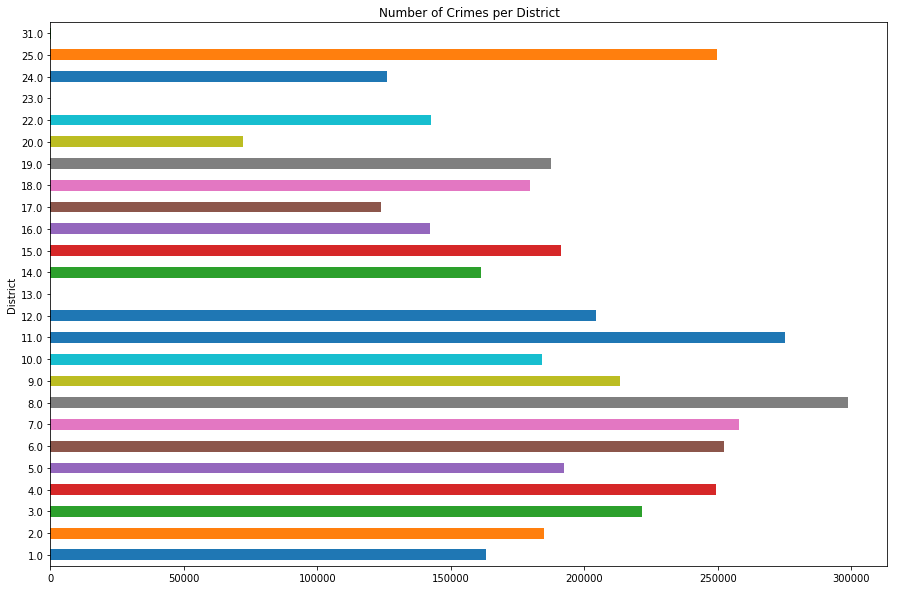

In [157]:
plt.figure(figsize=(15,10))

df.groupby([df['District']]).size().plot(kind='barh')
plt.title('Number of Crimes per District')


Text(0.5, 1.0, 'Number of Crimes per Primary Type')

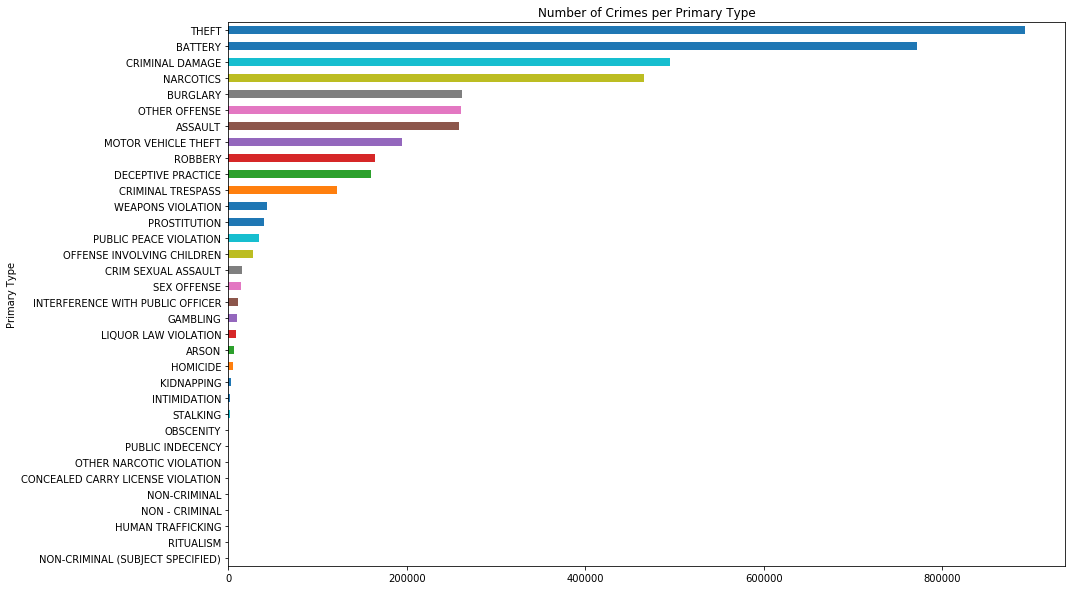

In [158]:
plt.figure(figsize=(15,10))

df.groupby([df['Primary Type']]).size().sort_values().plot(kind='barh')
plt.title('Number of Crimes per Primary Type')

Text(0.5, 1.0, 'Number of Crimes per Location Description (Top 30 Catagories Only)')

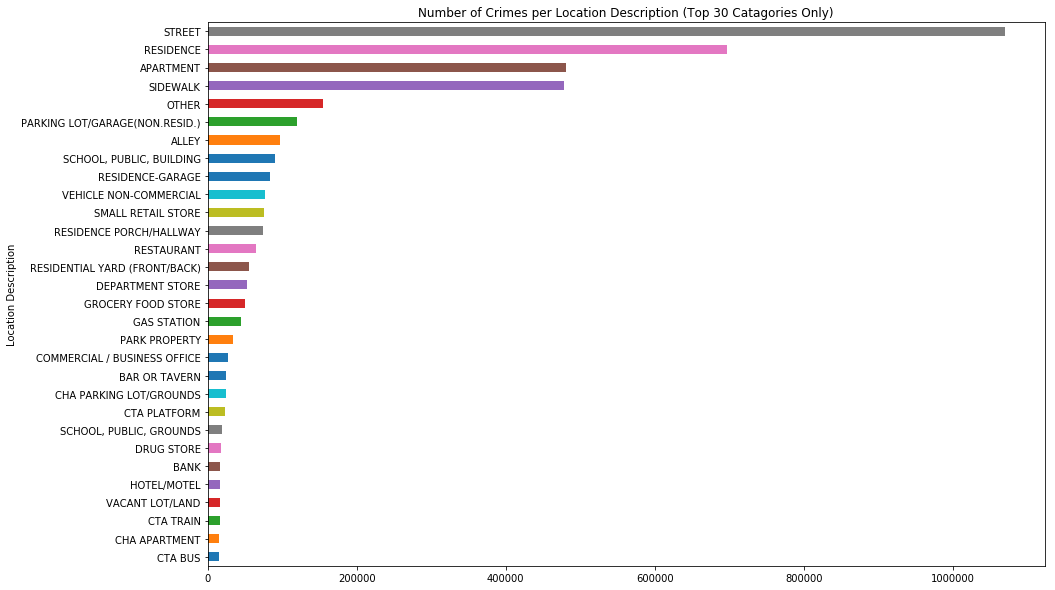

In [159]:
plt.figure(figsize=(15,10))

df.groupby([df['Location Description']]).size().sort_values().tail(30).plot(kind='barh')
plt.title('Number of Crimes per Location Description (Top 30 Catagories Only)')

Text(0.5, 1.0, 'Number of Crimes per Hour')

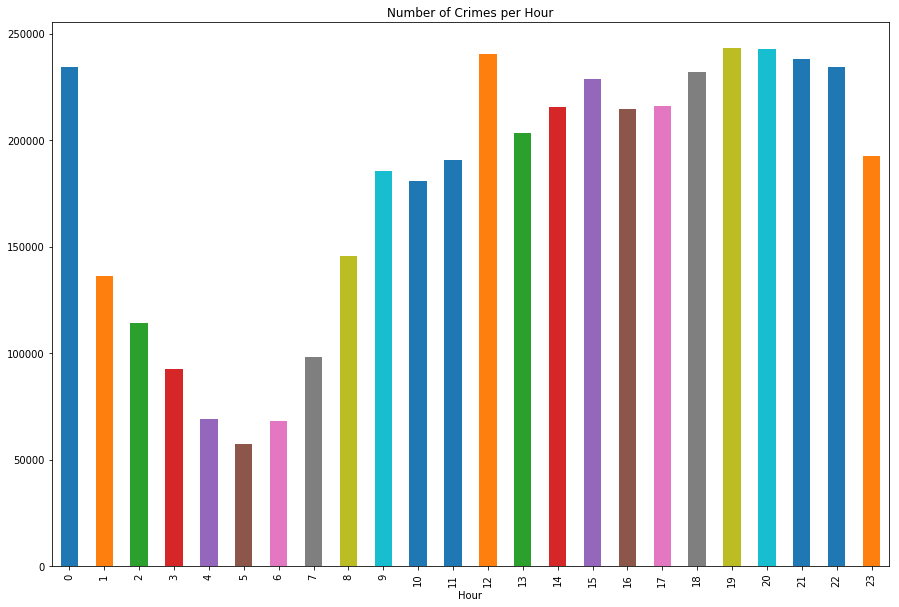

In [160]:
plt.figure(figsize=(15,10))

df.groupby([df['Hour']]).size().plot(kind='bar')
plt.title('Number of Crimes per Hour')

Text(0.5, 1.0, 'Number of Crimes per Arrest')

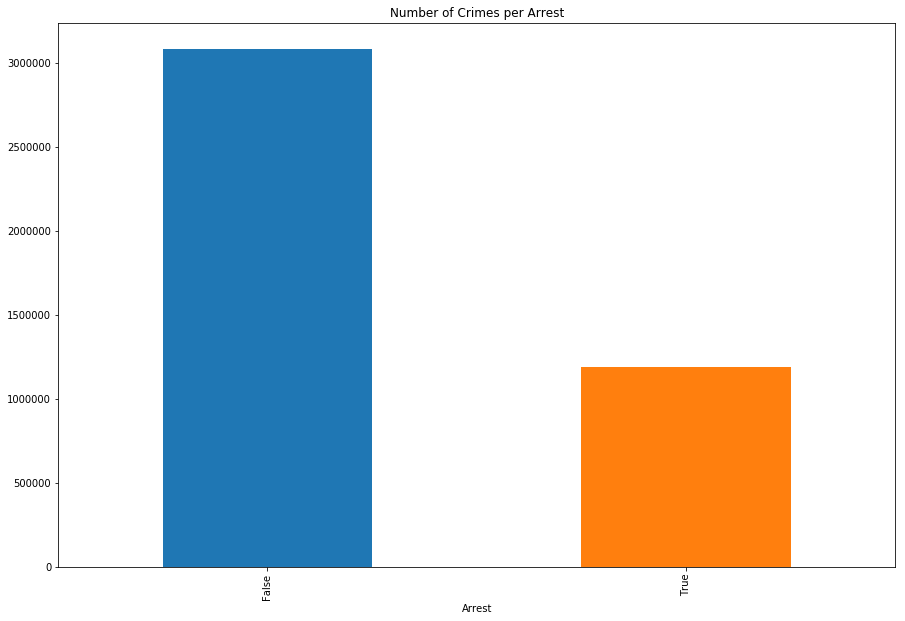

In [161]:
plt.figure(figsize=(15,10))

df.groupby([df['Arrest']]).size().plot(kind='bar')
plt.title('Number of Crimes per Arrest')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4273756 entries, 2006-04-02 13:00:00 to 2016-05-03 23:38:00
Data columns (total 14 columns):
ID                      int64
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), float64(3), int64(5), object(4)
memory usage: 432.0+ MB


Text(0.5, 1.0, 'Number of Crimes over the time period by Months')

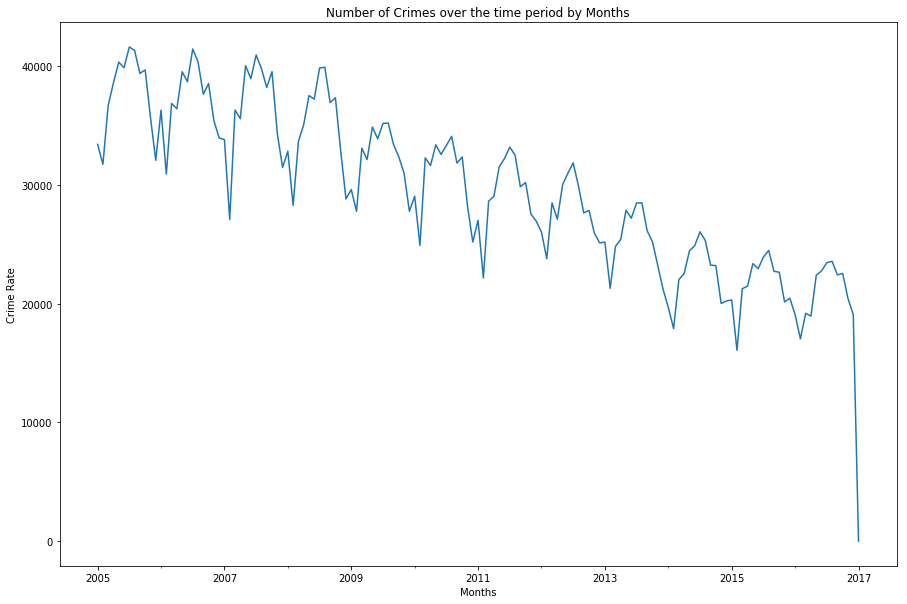

In [163]:
plt.figure(figsize=(15,10))
df.resample('M').size().plot(legend=False)

plt.ylabel('Crime Rate')
plt.xlabel('Months')
plt.title('Number of Crimes over the time period by Months')

Text(0.5, 1.0, 'Number of Crimes over the time period by Year')

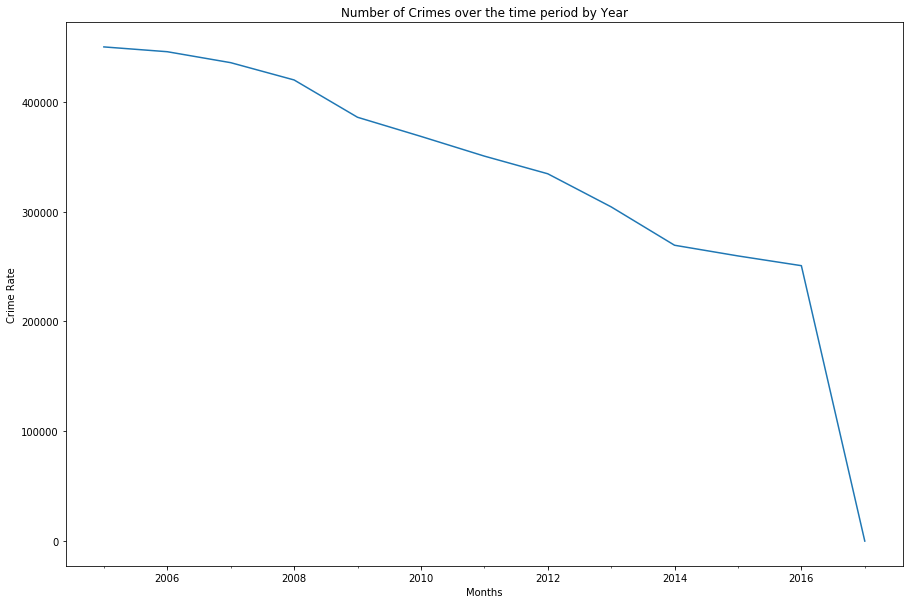

In [164]:
plt.figure(figsize=(15,10))
df.resample('Y').size().plot(legend=False)

plt.ylabel('Crime Rate')
plt.xlabel('Months')
plt.title('Number of Crimes over the time period by Year')

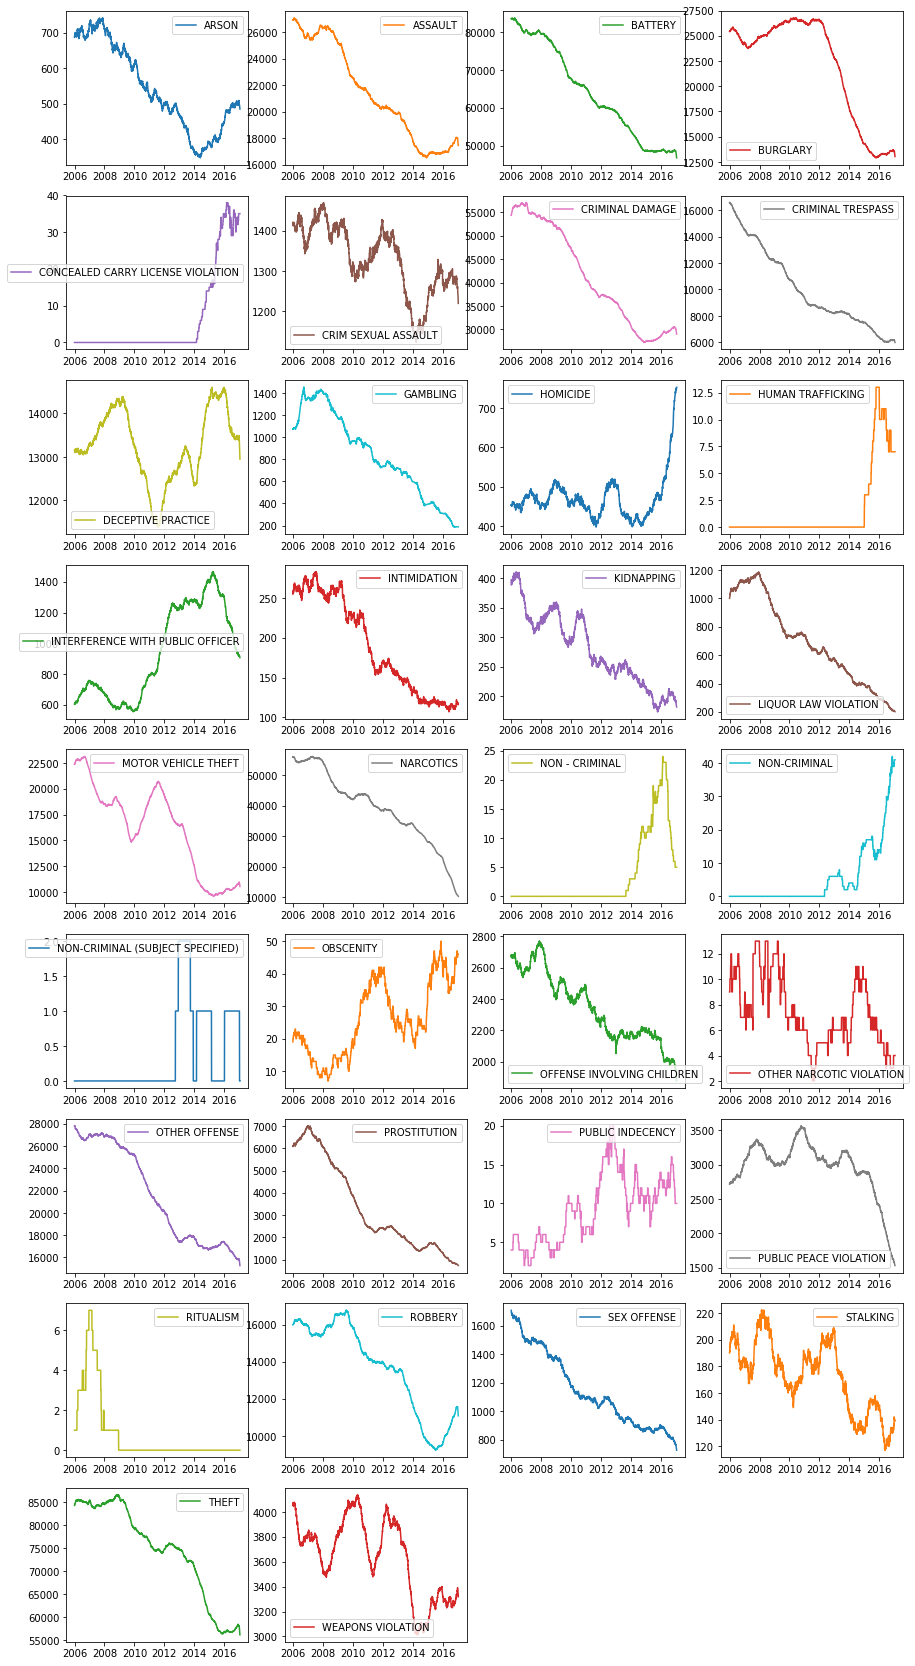

In [165]:
primary_crimes_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type',index=df.index.date,fill_value=0)

plo = primary_crimes_date.rolling(365).sum().plot(figsize=(15, 30), subplots=True, layout=(-1,4), sharex=False)


Text(0.5, 1.0, 'Crime Instances Per Day')

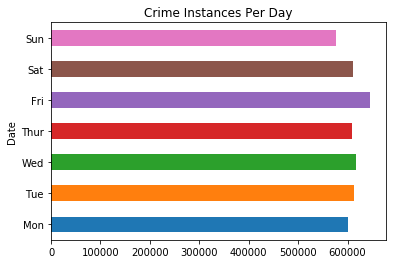

In [166]:
df.groupby([df.index.dayofweek]).size().plot(kind='barh')
plt.yticks(np.arange(7), ['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

plt.title('Crime Instances Per Day')
